<a href="https://colab.research.google.com/github/PandeyChhaya/Concepts-and-Technology-of-AI/blob/main/2522725_ChhayaPandey_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = '/content/drive/MyDrive/Concepts and Technology of AI/alzheimers_prediction_dataset.csv'
df = pd.read_csv(file)

print("The first five rows are:")
print(df.head())


#Checking data completeness by checking for missing values
print("\nThe missing values in the dataset are:")
print(df.isnull().sum())

#Checking for duplicate rows
print("\nThe rows that are duplicate are:")
print(df.duplicated().sum())

#Checking for data type, quality of data and data relevance to the target variable
print("\nData Types are:")
print(df.dtypes)


# Counting unique values for categorical columns
categorical = df.select_dtypes(include=['object']).columns
for col in categorical:
    print(f"Unique values in {col}: {df[col].nunique()}")



The first five rows are:
        Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy    


 Average summary statistics:
                Age  Education Level           BMI  Cognitive Test Score
count  74283.000000     74283.000000  74283.000000          74283.000000
mean      71.964703         9.487514     26.780639             64.654241
std       12.980748         5.757020      4.764679             20.153247
min       50.000000         0.000000     18.500000             30.000000
25%       61.000000         4.000000     22.700000             47.000000
50%       72.000000         9.000000     26.800000             65.000000
75%       83.000000        14.000000     30.900000             82.000000
max       94.000000        19.000000     35.000000             99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1 

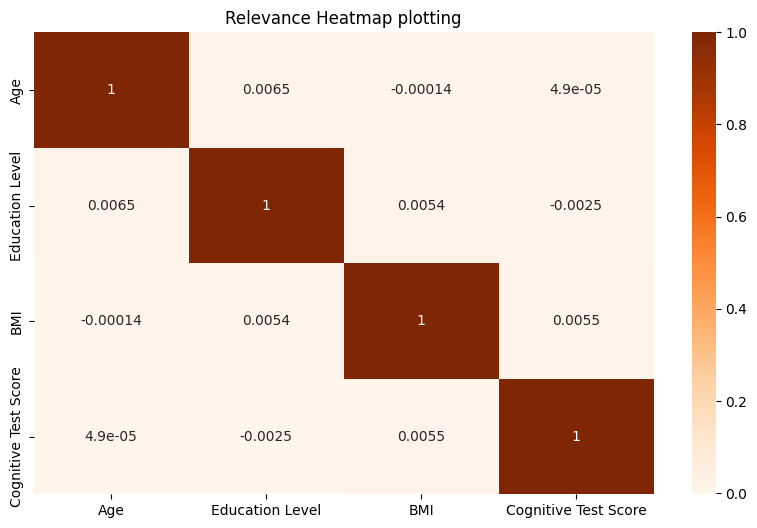

In [24]:
#Performing EDA

print("\n Average summary statistics:")
print(df.describe())

import seaborn as sns
import matplotlib.pyplot as plt
#data cleaning
print(df.info())
print(df.head())

# The below is to select numerical datatypes only

numeric_df = df.select_dtypes(include=['number'])

# Below is the relevance heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Oranges')
plt.title("Relevance Heatmap plotting")
plt.show()


In [25]:
#Building a model from scratch
#importing necessary libraries

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_features=4, n_classes=2, random_state=42)

# Below we have split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Below we have initialized weigths and biases
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # below is for gradient descent
        for _ in range(self.epochs):
            # below is the linear model
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Below gradients are computed
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Below weights and biases are updated
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Now that we have built the logistic regression from scratch, we will train the model

ourmodel = LogisticRegressionFromScratch(learning_rate=0.01, epochs=1000)
ourmodel.fit(X_train, y_train)

#Now that we have trained our model , we will evaluate it
#Below we have predicted on train and test set

y_train_prediction = ourmodel.predict(X_train)
y_test_prediction = ourmodel.predict(X_test)

# Below is the matrix for evaluation
def evaluate_model(y_true, y_prediction):
    print(f"Our model's accuracy is: {accuracy_score(y_true, y_prediction):.2f}")
    print(f"Our model's precision is: {precision_score(y_true, y_prediction):.2f}")
    print(f"The recall of our model is: {recall_score(y_true, y_prediction):.2f}")
    print(f"F1 Score of our model is : {f1_score(y_true, y_prediction):.2f}")
    print(f"Confusion Matrix for our model:\n{confusion_matrix(y_true, y_prediction)}\n")

print("The train set evaluation is as:")
evaluate_model(y_train, y_train_prediction)

print("The test set evaluation is as:")
evaluate_model(y_test, y_test_prediction)




The train set evaluation is as:
Our model's accuracy is: 0.90
Our model's precision is: 0.89
The recall of our model is: 0.90
F1 Score of our model is : 0.89
Confusion Matrix for our model:
[[182  22]
 [ 20 176]]

The test set evaluation is as:
Our model's accuracy is: 0.89
Our model's precision is: 0.88
The recall of our model is: 0.93
F1 Score of our model is : 0.90
Confusion Matrix for our model:
[[39  7]
 [ 4 50]]



In [32]:
#Building a primary model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

file = '/content/drive/MyDrive/Concepts and Technology of AI/alzheimers_prediction_dataset.csv'
df = pd.read_csv(file)

X = df.drop("Alzheimer’s Diagnosis", axis=1)
y = df["Alzheimer’s Diagnosis"]

# We are splitting the dataset into 80 % train and 20 % test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Replace categorical columns with encoded ones
X_train = X_train.drop(categorical_cols, axis=1).reset_index(drop=True)
X_test = X_test.drop(categorical_cols, axis=1).reset_index(drop=True)

# Below we are scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Now we will build and test two models


# Model 1: Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Model 2: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#Now that we have built two models , we will evaluate them


def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy is: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision is: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall is: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-Score is: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Confusion Matrix is:\n{confusion_matrix(y_test, y_pred)}\n")

print("Logistic Regression Evaluation came as below:")
evaluate_model(logistic_model, X_test, y_test)

print("Random Forest Classifier Evaluation came as below:")
evaluate_model(rf_model, X_test, y_test)




Logistic Regression Evaluation came as below:
Accuracy is: 0.71
Precision is: 0.70
Recall is: 0.71
F1-Score is: 0.70
Confusion Matrix is:
[[6831 1888]
 [2490 3648]]

Random Forest Classifier Evaluation came as below:
Accuracy is: 0.68
Precision is: 0.68
Recall is: 0.68
F1-Score is: 0.68
Confusion Matrix is:
[[6450 2269]
 [2474 3664]]



In [33]:
#Now we will do hyper-parameter optimization with cross - validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

log_reg = LogisticRegression(max_iter=500)
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

print("Best Logistic Regression Hyperparameters:", grid_log_reg.best_params_)


decision_tree = DecisionTreeClassifier()
param_grid_tree = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy')
grid_tree.fit(X_train, y_train)

print("Best Decision Tree Hyperparameters:", grid_tree.best_params_)
print("Best hyperparameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best hyperparameters for Decision Tree:", grid_tree.best_params_)



Best Logistic Regression Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Decision Tree Hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}


In [43]:
#Feature selection  and also building final model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


X = df.drop('Alzheimer’s Diagnosis', axis=1)
y = df['Alzheimer’s Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_columns),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_columns)
    ])


model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))
])


model.fit(X_train, y_train)


selector = SelectFromModel(model.named_steps['classifier'], threshold="mean")
X_train_selected = selector.transform(model.named_steps['preprocessor'].transform(X_train))
X_test_selected = selector.transform(model.named_steps['preprocessor'].transform(X_test))


final_model = LogisticRegression(penalty='l1', solver='liblinear')
final_model.fit(X_train_selected, y_train)


y_pred = final_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.7146
Classification Report:
              precision    recall  f1-score   support

          No       0.74      0.80      0.77     13065
         Yes       0.67      0.60      0.63      9220

    accuracy                           0.71     22285
   macro avg       0.71      0.70      0.70     22285
weighted avg       0.71      0.71      0.71     22285

